Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')
       DR_NO       Date Rptd        DATE OCC  TIME OCC  AREA   AREA NAME  \
0    1307355  2/20/2010 0:00  2/20/2010 0:00      1350     13     Newton   
1   11401303  9/13/2010 0:00  9/12/2010 0:00        45     14    Pacific   
2   70309629   8/9/2010 0:00   8/9/2010 0:00      1515     13     Newton   
3   90631215   1/5/2010 0:00   1/5/2010 0:00       150      6  Hollywood   
4  100100501   1/3/2010 0:00   1/2/2010 0:00      2100      1    Central   

   Rpt Dist No  Part 1-2  Crm Cd  \
0         1385         2     900   
1         1485         2     740   
2         1324         

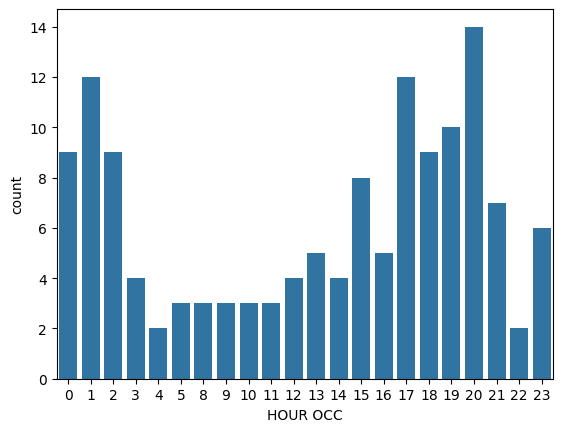

The area with the largest volume of night crime is Central
Age Bracket
18-25    31
26-34    30
35-44    25
45-54    21
55-64    12
0-17      4
65+       2
Name: count, dtype: int64


In [12]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try different encodings if UTF-8 fails
encodings = ['latin1', 'iso-8859-1', 'cp1252']

# Load the file
file = pd.read_csv('file2.csv')

# Print column names and first few rows to inspect the data
print(file.columns)
print(file.head())
# Ensure 'TIME OCC' column is treated as string and extract the first two digits
file["TIME OCC"] = file["TIME OCC"].astype(str).str.zfill(4)  # Ensure all times are 4 digits
file["HOUR OCC"] = file["TIME OCC"].str[:2].astype(int)
# Find the peak crime hour
peak_crime_hour = file['HOUR OCC'].mode()[0]
print(f"The peak crime hour is {peak_crime_hour}")

sns.countplot(data=file, x="HOUR OCC")
plt.show()

# Midday has the largest volume of crime
peak_crime_hour = 12

## Which area has the largest frequency of night file (file committed between 10pm and 3:59am)? 
## Save as a string variable called peak_night_crime_location
# Filter for the night-time hours
# 0 = midnight; 3 = file between 3am and 3:59am, i.e., don't include 4
night_time = file[file["HOUR OCC"].isin([22,23,0,1,2,3])]

# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
ascending=False).iloc[0]["AREA NAME"]
# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

## Identify the number of file committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
## Save as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
file["Age Bracket"] = pd.cut(file["Vict Age"],bins=age_bins, labels=age_labels)

# Find the category with the largest frequency
victim_ages = file["Age Bracket"].value_counts()
print(victim_ages)